<a href="https://colab.research.google.com/github/zhi-yu-lin/data-and-python/blob/main/Final_project_zyLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce sales Analysis



## Author and date
---



## Objectives
profitability of e-commerce sales
---


## The dataset
_reference and link to the source of the data_

---



In [44]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

df = pd.read_csv('Amazon Sale Report.csv')

<ipython-input-44-f1833026dc3e>:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


* description of the dataset (number of records, statistics, columns, etc)
* description of the processing with code in the box below to show summary information about the data


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


## Cleaning the data
_what will you do to get the data ready for analysis_
* sorting
* removing null data
* forming new data tables
* ...
---


In [46]:
# Removing null column
df = df.drop('Unnamed: 22', axis = 1)
df = df.drop('Courier Status', axis = 1)


In [47]:
# Convert dates to date format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df = df.sort_values(by='Date', ascending = True, ignore_index=True)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,48970,404-1445673-1345134,2022-03-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,...,1,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,49001,406-7387241-2881923,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,...,1,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
2,49002,402-9332104-0945115,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,...,0,INR,416.19,GURGAON,HARYANA,122001.0,IN,NaN,False,Easy Ship
3,49003,408-1008226-2450750,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,1,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
4,49004,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,...,1,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,91621,405-1821263-0775503,2022-06-29,Pending,Amazon,Amazon.in,Expedited,SET196,SET196-KR-NP-XL,Set,...,1,INR,668.00,Bangalore,KARNATAKA,560085.0,IN,NaN,False,NaN
128971,91620,406-6133797-2628332,2022-06-29,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-S,Set,...,1,INR,612.00,PATNA,BIHAR,800002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,91619,403-5461377-2549911,2022-06-29,Pending,Amazon,Amazon.in,Expedited,J0111,J0111-TP-XL,Top,...,1,INR,423.00,BENGALURU,KARNATAKA,560026.0,IN,NaN,False,NaN
128973,91617,403-7681331-8953128,2022-06-29,Pending,Merchant,Amazon.in,Standard,JNE3776,JNE3776-KR-XL,kurta,...,1,INR,301.00,Loni,UTTAR PRADESH,201102.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


## Analysing the data
_what analysis are you doing and why_
* producing summary statistics
* printing calculated statistics
* data analysis calculations (e.g. regression, correlation)
* ...

---



In [48]:
# Calculate the daily income
df['daily_income'] = df.groupby('Date')['Amount'].transform('sum')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,daily_income
0,48970,404-1445673-1345134,2022-03-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,...,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,101683.85
1,49001,406-7387241-2881923,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,...,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,101683.85
2,49002,402-9332104-0945115,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,...,INR,416.19,GURGAON,HARYANA,122001.0,IN,NaN,False,Easy Ship,101683.85
3,49003,408-1008226-2450750,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,101683.85
4,49004,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,...,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,101683.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,91621,405-1821263-0775503,2022-06-29,Pending,Amazon,Amazon.in,Expedited,SET196,SET196-KR-NP-XL,Set,...,INR,668.00,Bangalore,KARNATAKA,560085.0,IN,NaN,False,NaN,411530.76
128971,91620,406-6133797-2628332,2022-06-29,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-S,Set,...,INR,612.00,PATNA,BIHAR,800002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,411530.76
128972,91619,403-5461377-2549911,2022-06-29,Pending,Amazon,Amazon.in,Expedited,J0111,J0111-TP-XL,Top,...,INR,423.00,BENGALURU,KARNATAKA,560026.0,IN,NaN,False,NaN,411530.76
128973,91617,403-7681331-8953128,2022-06-29,Pending,Merchant,Amazon.in,Standard,JNE3776,JNE3776-KR-XL,kurta,...,INR,301.00,Loni,UTTAR PRADESH,201102.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,411530.76


## Visualising the data
_graphical or textual visualisation of the data_

---



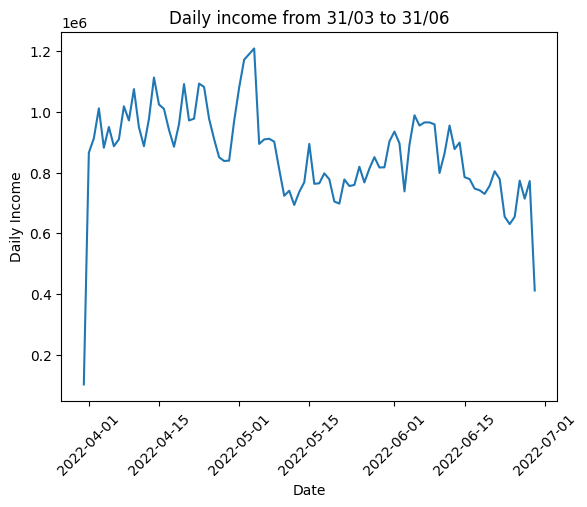

In [49]:
# Analyze the monthly income
income_data = df.groupby('Date')['daily_income'].mean()
plt.plot(income_data.keys(), income_data)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily Income')
plt.title('Daily income from 31/03 to 31/06')
plt.show()


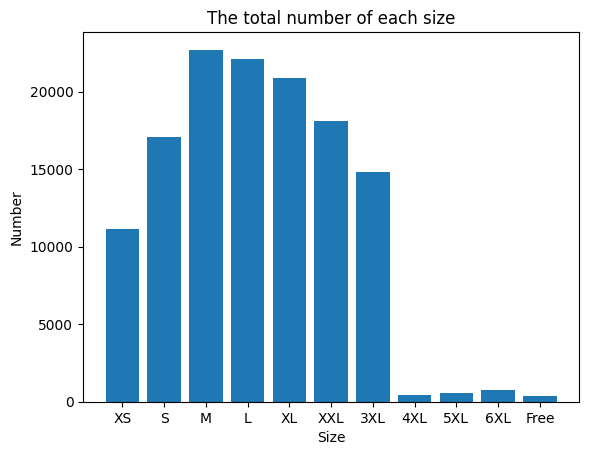

In [83]:
# Analyze the size of ppl

size_data = df[['index','Size']].groupby('Size').count()
custom_order = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'Free']
size_data

plt.xlabel('Size')
plt.ylabel('Number')
plt.title('The total number of each size')
plt.bar(custom_order, size_data['index'])

plt.show()


In [ ]:
# Analyze the category
# Sale map

# Summary
_what has this dataset told you_
_include what you have learnt from this project_